In [4]:
pip install opendatasets

  Using cached opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)


In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shwetabh123/mall-customers")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shwetabh123/mall-customers


100%|██████████| 1.56k/1.56k [00:00<00:00, 5.14MB/s]

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pandas.plotting import scatter_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings

In [13]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [14]:
mall_df = pd.read_csv('/content/mall-customers/Mall_Customers.csv')
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Iris Dataset EDA

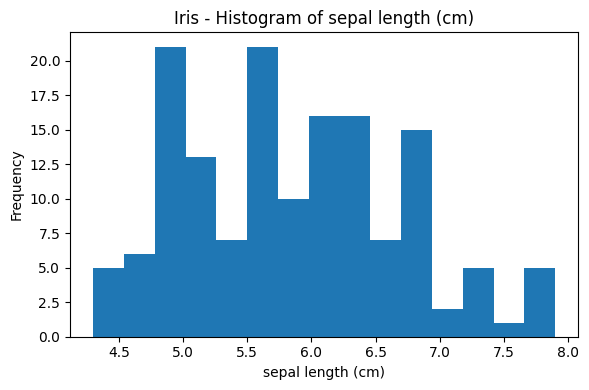

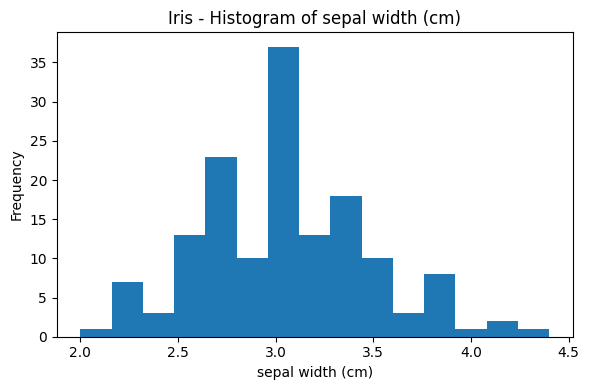

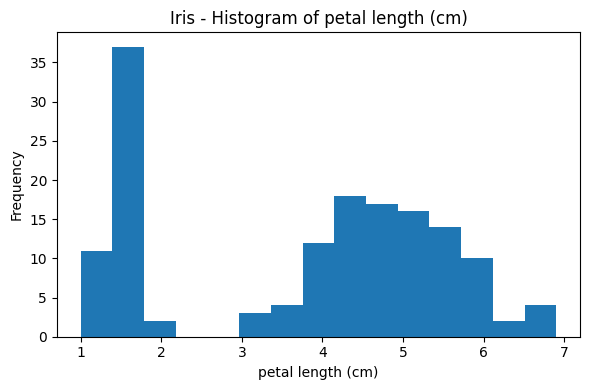

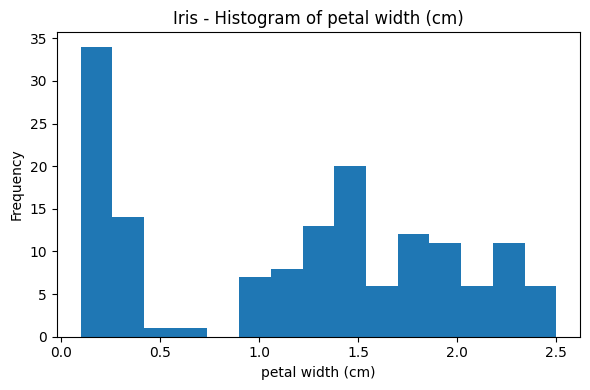

In [15]:
for i, col in enumerate(iris_df.columns[:-1]):
    plt.figure(figsize=(6,4))
    plt.hist(iris_df[col], bins=15)
    plt.title(f'Iris - Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<Figure size 900x900 with 0 Axes>

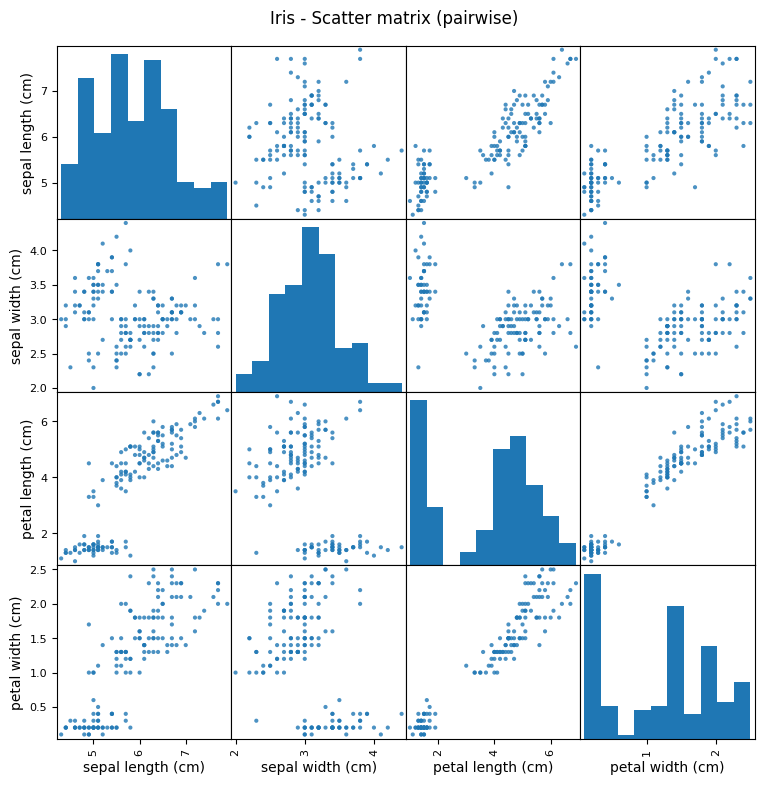

In [16]:
plt.figure(figsize=(9,9))
scatter_matrix(iris_df[iris_df.columns[:-1]], alpha=0.8, diagonal='hist', figsize=(9,9))
plt.suptitle("Iris - Scatter matrix (pairwise)", y=0.92)
plt.show()

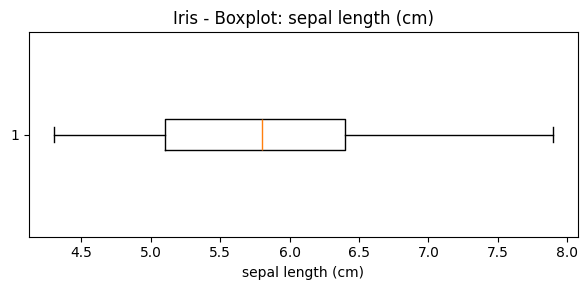

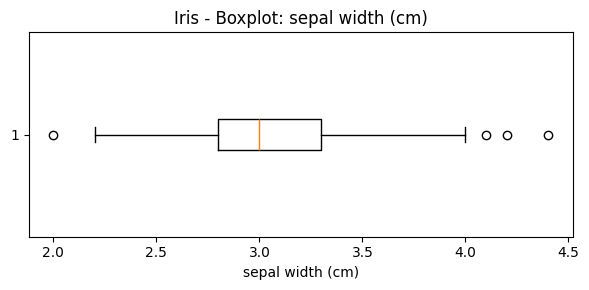

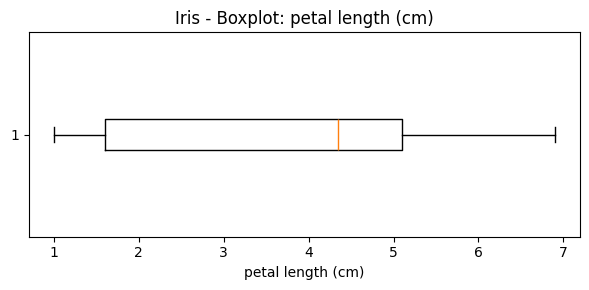

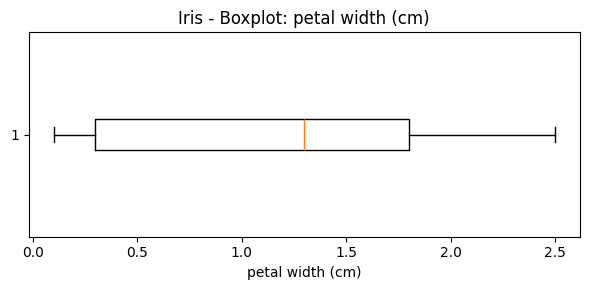

In [17]:
for col in iris_df.columns[:-1]:
    plt.figure(figsize=(6,3))
    plt.boxplot(iris_df[col], vert=False)
    plt.title(f'Iris - Boxplot: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

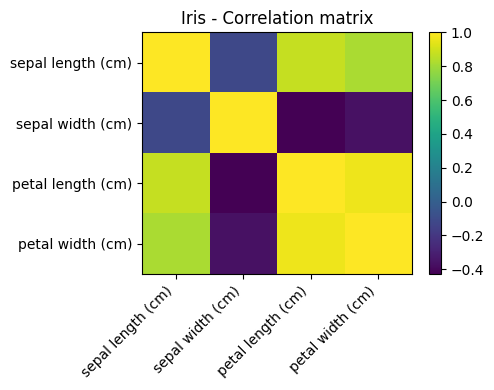

In [18]:
iris_corr = iris_df.iloc[:,:-1].corr()
plt.figure(figsize=(5,4))
plt.imshow(iris_corr.values, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(iris_corr)), iris_corr.columns, rotation=45, ha='right')
plt.yticks(range(len(iris_corr)), iris_corr.index)
plt.title('Iris - Correlation matrix')
plt.tight_layout()
plt.show()

## Mall Dataset EDA

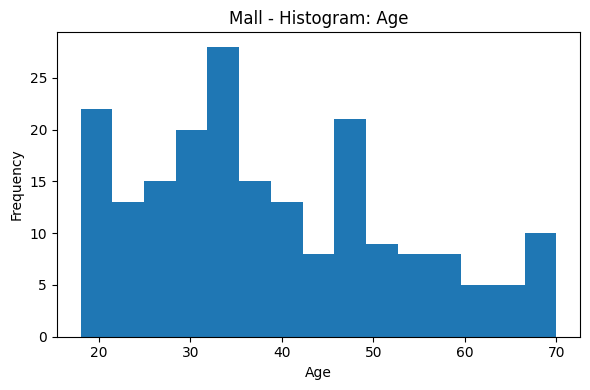

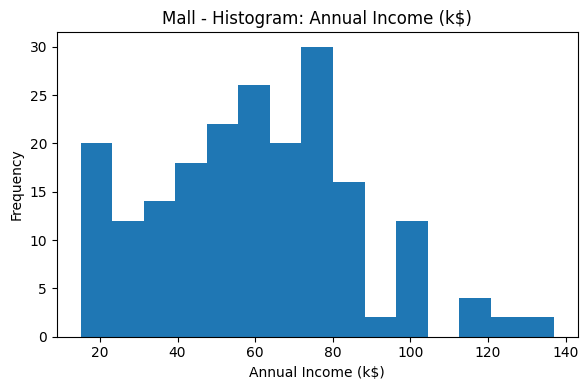

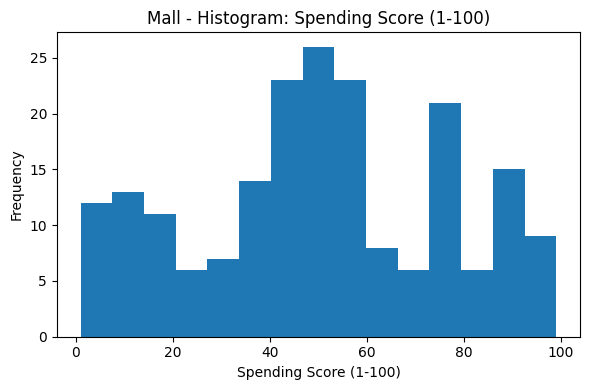

In [19]:
for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    plt.figure(figsize=(6,4))
    plt.hist(mall_df[col], bins=15)
    plt.title(f'Mall - Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-2409398987.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_groups, labels=['Male','Female'])


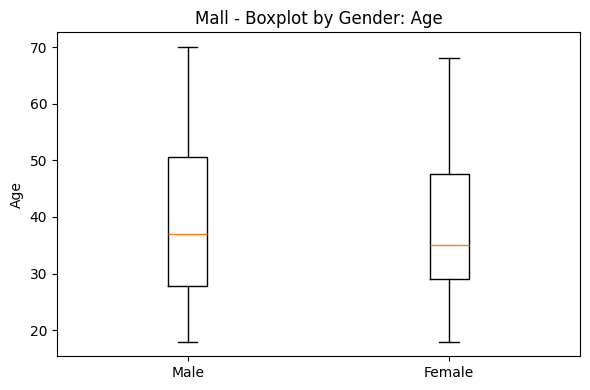

/tmp/ipython-input-2409398987.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_groups, labels=['Male','Female'])


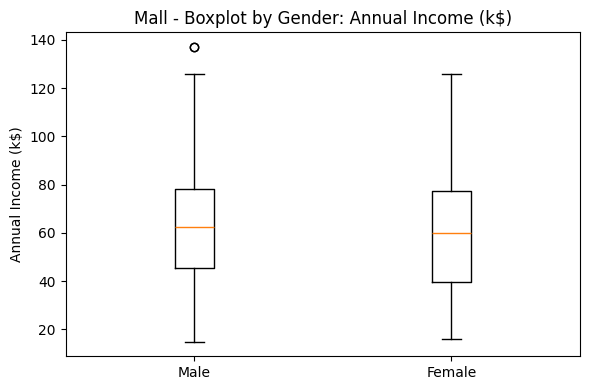

/tmp/ipython-input-2409398987.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_groups, labels=['Male','Female'])


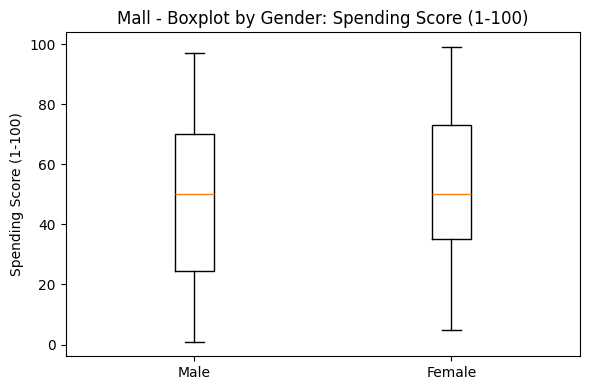

In [24]:
for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    plt.figure(figsize=(6,4))
    # create boxplot groups manually
    data_groups = [mall_df[mall_df['Genre']=='Male'][col].values, mall_df[mall_df['Genre']=='Female'][col].values]
    plt.boxplot(data_groups, labels=['Male','Female'])
    plt.title(f'Mall - Boxplot by Gender: {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


<Figure size 900x900 with 0 Axes>

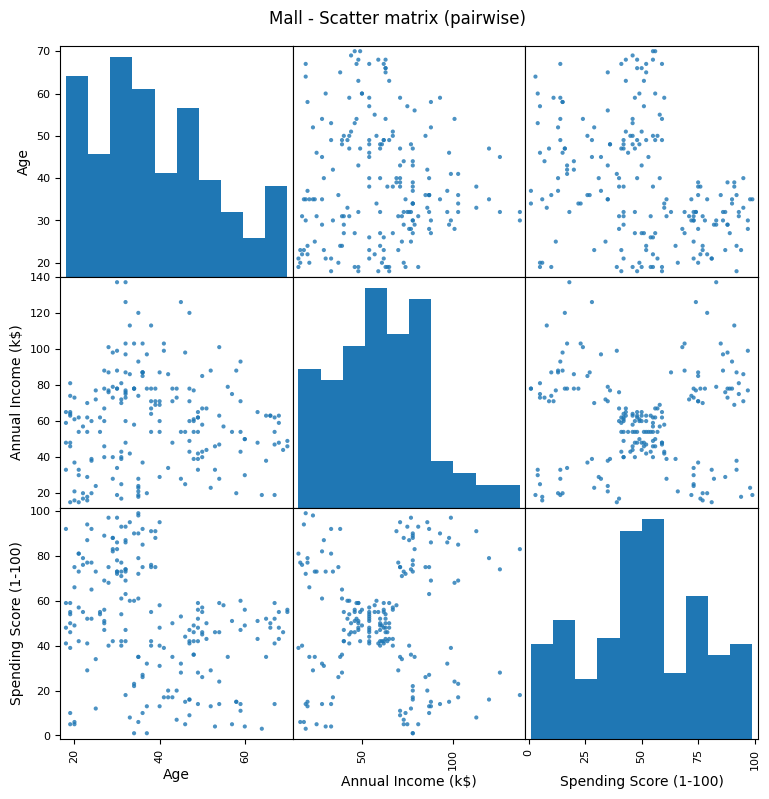

In [25]:
plt.figure(figsize=(9,9))
scatter_matrix(mall_df[['Age','Annual Income (k$)','Spending Score (1-100)']], alpha=0.8, diagonal='hist', figsize=(9,9))
plt.suptitle("Mall - Scatter matrix (pairwise)", y=0.92)
plt.show()

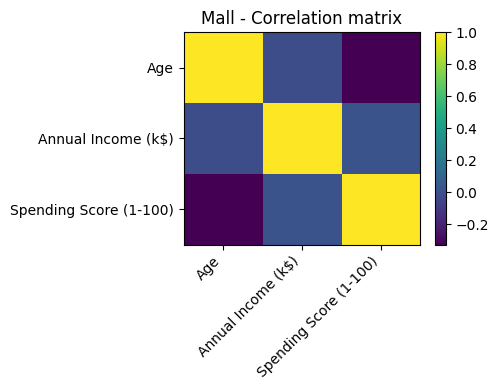

In [26]:
mall_corr = mall_df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()
plt.figure(figsize=(5,4))
plt.imshow(mall_corr.values, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(mall_corr)), mall_corr.columns, rotation=45, ha='right')
plt.yticks(range(len(mall_corr)), mall_corr.index)
plt.title('Mall - Correlation matrix')
plt.tight_layout()
plt.show()

In [30]:
X_iris = iris.data
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

In [31]:
inertia = []
silhouette = []
K = range(2, 9)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    labels = model.fit_predict(X_iris_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(X_iris_scaled, labels))

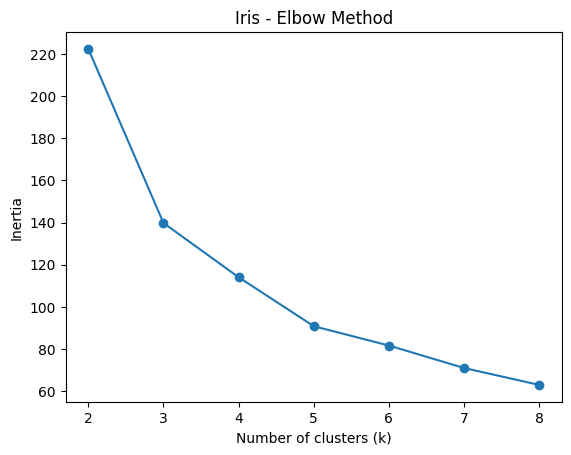

In [32]:
plt.plot(K, inertia, 'o-')
plt.title("Iris - Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

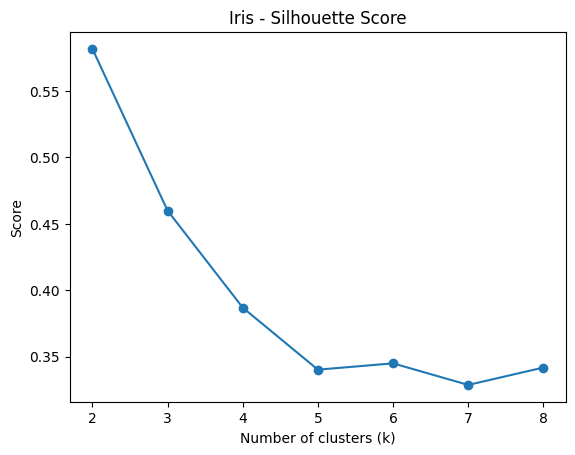

In [33]:
plt.plot(K, silhouette, 'o-')
plt.title("Iris - Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.show()

In [34]:
best_k = K[np.argmax(silhouette)]
print("Best k for Iris =", best_k)

Best k for Iris = 2


In [35]:
final_kmeans = KMeans(n_clusters=best_k, n_init=10)
iris_df['Cluster'] = final_kmeans.fit_predict(X_iris_scaled)
print(iris_df['Cluster'].value_counts())

Cluster
0    100
1     50
Name: count, dtype: int64


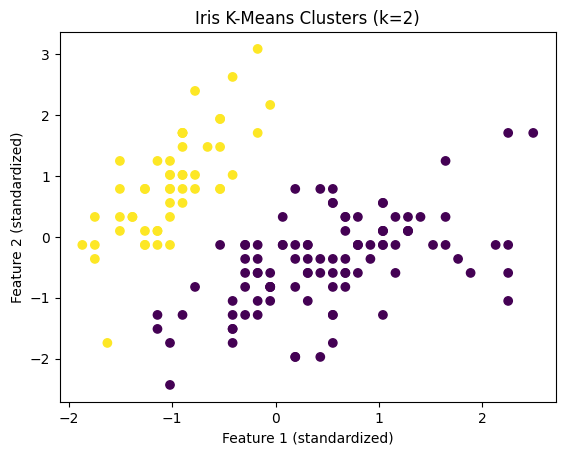

In [36]:
plt.scatter(X_iris_scaled[:,0], X_iris_scaled[:,1], c=iris_df['Cluster'])
plt.title(f"Iris K-Means Clusters (k={best_k})")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.show()


In [40]:
Z = linkage(X_iris_scaled, method='ward')

hc_labels = fcluster(Z, t=3, criterion='maxclust')
iris_df['HC_Cluster'] = hc_labels
print(iris_df['HC_Cluster'].value_counts())


HC_Cluster
3    71
1    49
2    30
Name: count, dtype: int64
